KNN classification on diabetes dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
data=pd.read_csv('./Data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
non_zero=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in non_zero:
    data[col]=data[col].replace(0,np.NaN)
    mean=int(data[col].mean(skipna=True))
    data[col]=data[col].replace(np.NaN,mean)
    #print(data[col])

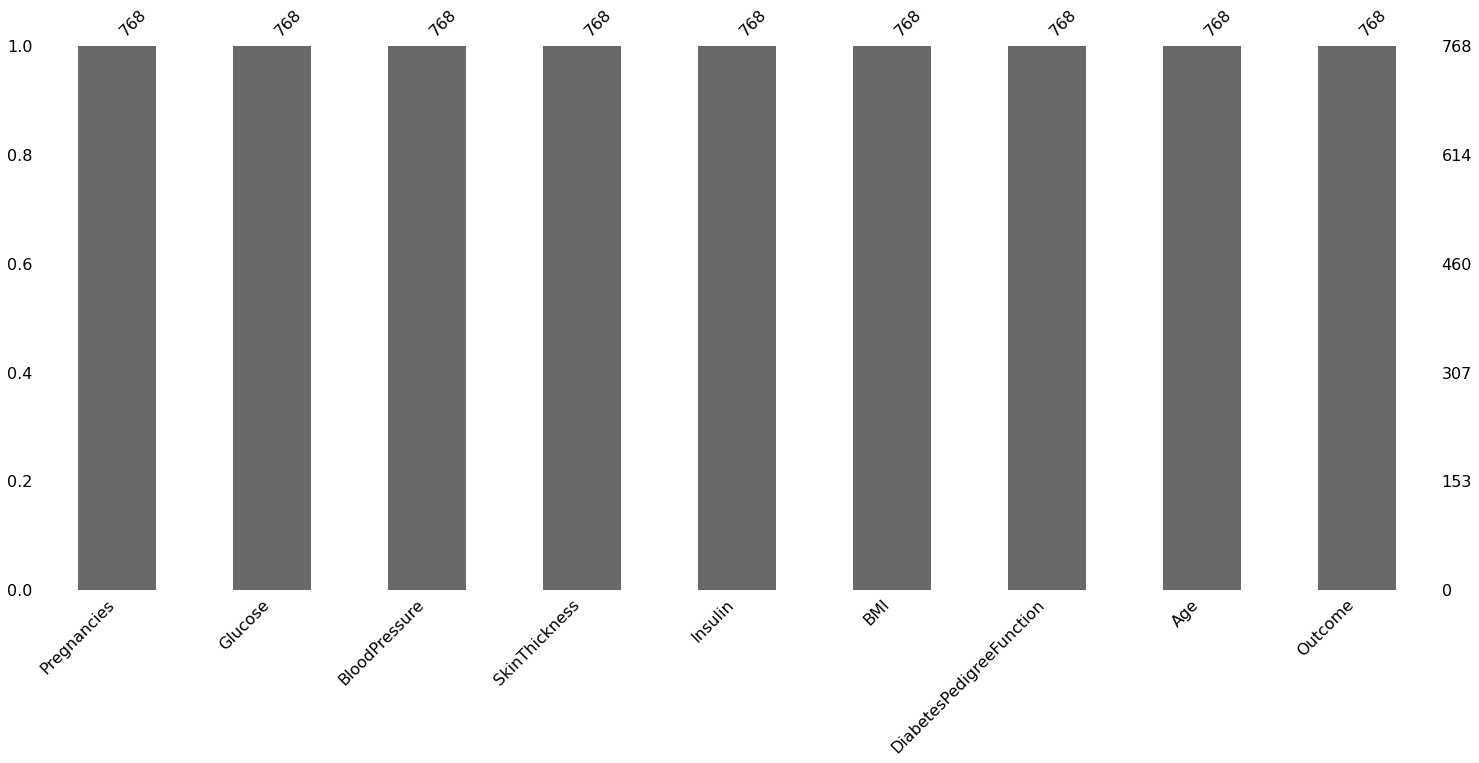

In [4]:
import missingno as msno
p=msno.bar(data)

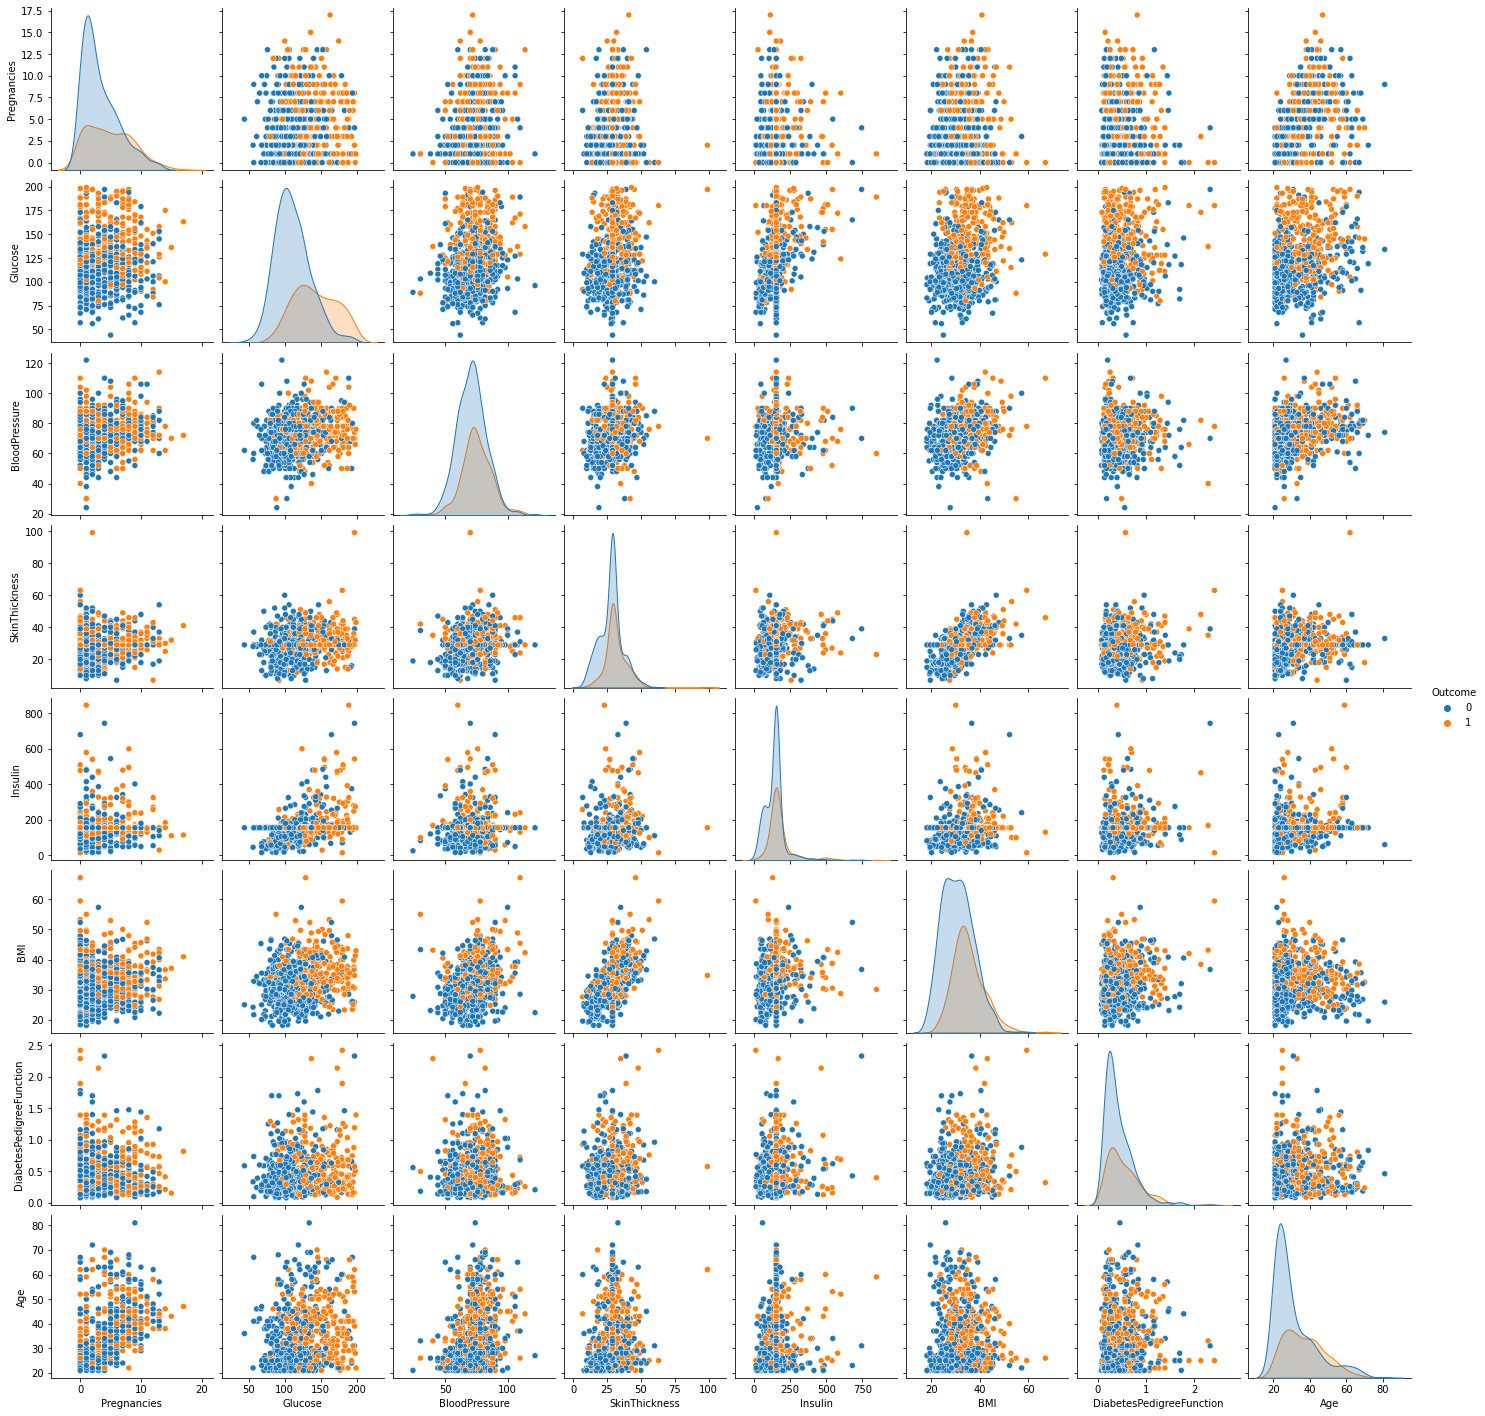

In [5]:
import seaborn as sns
p=sns.pairplot(data,hue='Outcome')

In [6]:
x=data.iloc[:,0:8]
y=data.iloc[:,8]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale. For e.g. an dataset will contain insulin column with values on scale 20-70 and Glucose column with values on scale 80-200. As these two columns are different in scale, they are Standardized to have common scale while building machine learning model

In [9]:
import math
math.sqrt(len(y_test))

12.409673645990857

We have taken this value to get the value of K. We need an odd value of K so we will make it 12-1 or 12+1.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean').fit(x_train,y_train)

In [11]:
y_pred=classifier.predict(x_test)
#y_pred

In [12]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[90, 15],
       [16, 33]], dtype=int64)

In [13]:
print(f'f1 score : {f1_score(y_test,y_pred):.5f}')

f1 score : 0.68041


In [14]:
print(f'Accuracy score : {accuracy_score(y_test,y_pred):.5f}')

Accuracy score : 0.79870


C:\Users\Harsh Ranjan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Harsh Ranjan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


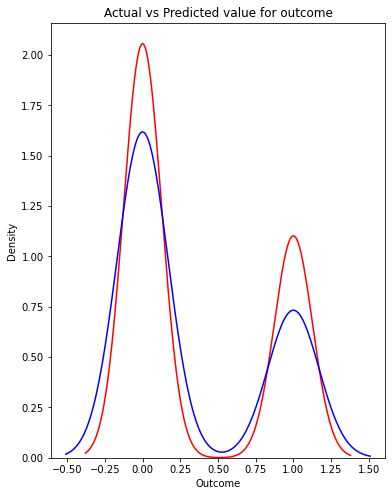

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,8))
ax=sns.distplot(data['Outcome'],hist=False,color='red',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value')

plt.title('Actual vs Predicted value for outcome')
plt.show()
plt.close()